### Imports

In [6]:
import os
import re
import sys
from itertools import permutations

import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer
from tqdm import tqdm

from src.taxonomy.heuristics import Heuristics

# os.chdir("../../")
sys.path.append("./")
sys.path.append("../../")

from src.config import *
from src.utilities import printt

2023-04-12 10:48:13.130982: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-12 10:48:13.131012: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
os.chdir("../../")
os.getcwd()

'/home/salvi/wiki_image_classification'

### Evaluation

In [7]:
df_heuristics = pd.read_csv(os.path.join(EVALUATION_PATH, "heuristics_evaluation.csv"))

In [8]:
df_heuristics_top = df_heuristics.sort_values(
    by="macro_avg_f1_score", ascending=False
).copy()
df_heuristics_top = df_heuristics_top.set_index("heuristics_version")
df_heuristics_top = df_heuristics_top[
    [
        "macro_avg_f1_score",
        "micro_avg_f1_score",
        "samples_avg_f1_score",
        "weighted_avg_f1_score",
        "macro_avg_precision",
        "micro_avg_precision",
        "samples_avg_precision",
        "weighted_avg_precision",
        "macro_avg_recall",
        "micro_avg_recall",
        "samples_avg_recall",
        "weighted_avg_recall",
    ]
]

In [9]:
df_heuristics_top.iloc[:10]

,macro_avg_f1_score,micro_avg_f1_score,samples_avg_f1_score,weighted_avg_f1_score,macro_avg_precision,micro_avg_precision,samples_avg_precision,weighted_avg_precision,macro_avg_recall,micro_avg_recall,samples_avg_recall,weighted_avg_recall
heuristics_version,,,,,,,,,,,,
headJ+embedding10+lookahead+depth,0.494066,0.535070,0.543958,0.541628,0.491598,0.442053,0.507344,0.498441,0.631168,0.677665,0.683366,0.677665
headJ+lookahead+embedding10+depth,0.490566,0.535268,0.545294,0.541647,0.487765,0.441784,0.508909,0.498087,0.631486,0.678934,0.686424,0.678934
lookahead+headJ+depth+embedding10,0.485274,0.532331,0.538802,0.539418,0.483680,0.439934,0.498375,0.497630,0.622838,0.673858,0.679798,0.673858
headJ+lookahead+depth+embedding10,0.484717,0.530409,0.537560,0.539564,0.483296,0.436782,0.496081,0.497366,0.621298,0.675127,0.680818,0.675127
lookahead+headJ+embedding10+depth,0.484652,0.533066,0.543953,0.538883,0.482936,0.440397,0.509128,0.495845,0.625098,0.675127,0.683621,0.675127
headJ+embedding10+depth+lookahead,0.484471,0.527255,0.538157,0.534852,0.482592,0.432520,0.500856,0.490362,0.621589,0.675127,0.679216,0.675127
embedding10+lookahead+headJ+depth,0.482244,0.534137,0.545360,0.541807,0.485374,0.441860,0.514028,0.500057,0.600992,0.675127,0.679085,0.675127
embedding10+headJ+lookahead+depth,0.481352,0.533066,0.544583,0.542594,0.484680,0.440397,0.512248,0.499949,0.594726,0.675127,0.679340,0.675127
lookahead+headJ+depth,0.480903,0.533058,0.540047,0.537262,0.484230,0.449477,0.510251,0.502852,0.605525,0.654822,0.662214,0.654822


In [11]:
df_heuristics_top.loc["headJ+embedding10+lookahead+depth"]

macro_avg_f1_score        0.494066
micro_avg_f1_score        0.535070
samples_avg_f1_score      0.543958
weighted_avg_f1_score     0.541628
macro_avg_precision       0.491598
micro_avg_precision       0.442053
samples_avg_precision     0.507344
weighted_avg_precision    0.498441
macro_avg_recall          0.631168
micro_avg_recall          0.677665
samples_avg_recall        0.683366
weighted_avg_recall       0.677665
Name: headJ+embedding10+lookahead+depth, dtype: float64

In [44]:
# "base" version
df_heuristics_top.loc["headJ+depth"]

macro_avg_f1_score        0.462355
micro_avg_f1_score        0.525751
samples_avg_f1_score      0.529333
weighted_avg_f1_score     0.523391
macro_avg_precision       0.489498
micro_avg_precision       0.455390
samples_avg_precision     0.511497
weighted_avg_precision    0.513726
macro_avg_recall          0.566282
micro_avg_recall          0.621827
samples_avg_recall        0.629034
weighted_avg_recall       0.621827
Name: headJ+depth, dtype: float64

### Does combining different thresholds of embeddings help?

In [ ]:
heuristics_list = [
    "headJ+embedding10+lookahead+depth",
    "headJ+embedding10+lookahead+embedding15+depth",
    "headJ+embedding10+lookahead+embedding20+depth",
    "headJ+embedding10+lookahead+embedding25+depth",
    "headJ+embedding10+lookahead+embedding30+depth",
    "headJ+embedding10+lookahead+embedding35+depth",
]


printt("Loading files...")
files_annotated = pd.read_parquet(EVALUATION_PATH + "annotated_validation.parquet")
heuristics = Heuristics()
printt("Loading graph...")
heuristics.load_graph(EH_GRAPH_PATH)
printt("Loading mapping...")
heuristics.set_taxonomy(taxonomy_version=TAXONOMY_VERSION)

encoder = MultiLabelBinarizer()
labels_true = encoder.fit_transform(files_annotated.labels)

# Evaluate heuristics
printt("Evaluating heuristics...")
df_list = []
for heuristics_version in tqdm(heuristics_list):
    heuristics.set_heuristics(heuristics_version=heuristics_version)
    heuristics.reset_labels()
    labels_pred = files_annotated.apply(
        lambda x: heuristics.queryFile(x, debug=False),
        axis=1,
        result_type="expand",
    )[0]
    labels_pred = labels_pred.apply(list)
    labels_pred = encoder.transform(labels_pred)
    report = classification_report(
        labels_true,
        labels_pred,
        target_names=encoder.classes_,
        output_dict=True,
        zero_division=0,
    )

    df = pd.DataFrame(report).T
    df = df.reset_index().rename({"index": "class"}, axis=1)
    df["heuristics_version"] = heuristics_version
    df_list.append(df)

df_heuristics_new = pd.concat(df_list)
df_heuristics_new = df_heuristics_new.pivot_table(
    index=["heuristics_version"], columns=["class"]
)
cols = [
    re.sub("[- ]", "_", f"{col[1].lower()}_{col[0]}")
    for col in df_heuristics_new.columns.values
]
df_heuristics_new.columns = cols

In [37]:
df_heuristics_new = df_heuristics_new.sort_values(
    by="macro_avg_f1_score", ascending=False
)
df_heuristics_new_top = df_heuristics_new_top[
    [
        "macro_avg_f1_score",
        "micro_avg_f1_score",
        "samples_avg_f1_score",
        "weighted_avg_f1_score",
        "macro_avg_precision",
        "micro_avg_precision",
        "samples_avg_precision",
        "weighted_avg_precision",
        "macro_avg_recall",
        "micro_avg_recall",
        "samples_avg_recall",
        "weighted_avg_recall",
    ]
]
df_heuristics_new_top

,macro_avg_f1_score,micro_avg_f1_score,samples_avg_f1_score,weighted_avg_f1_score,macro_avg_precision,micro_avg_precision,samples_avg_precision,weighted_avg_precision,macro_avg_recall,micro_avg_recall,samples_avg_recall,weighted_avg_recall
heuristics_version,,,,,,,,,,,,
headJ+embedding10+lookahead+depth,0.494066,0.535070,0.543958,0.541628,0.491598,0.442053,0.507344,0.498441,0.631168,0.677665,0.683366,0.677665
headJ+embedding10+lookahead+embedding15+depth,0.469325,0.505442,0.516319,0.518408,0.467733,0.403019,0.470085,0.467817,0.615468,0.677665,0.679012,0.677665
headJ+embedding10+lookahead+embedding20+depth,0.416240,0.458508,0.471076,0.477264,0.410309,0.342303,0.413477,0.414817,0.598450,0.694162,0.682507,0.694162
headJ+embedding10+lookahead+embedding25+depth,0.377692,0.392869,0.430318,0.441448,0.362243,0.269140,0.361916,0.365986,0.646265,0.727157,0.720857,0.727157
headJ+embedding10+lookahead+embedding30+depth,0.329981,0.308083,0.364519,0.408680,0.304234,0.192626,0.290404,0.316780,0.708032,0.769036,0.757103,0.769036
headJ+embedding10+lookahead+embedding35+depth,0.292467,0.257889,0.310346,0.372010,0.248575,0.152324,0.234660,0.269466,0.782619,0.840102,0.823005,0.840102


Adding extra layers of embeddings seems to decrease performances, because despite the increase in recall the precision drops significantly.

## Confusion matrix

In [39]:
import matplotlib.pyplot as plt
from mlcm import mlcm
from sklearn.metrics import ConfusionMatrixDisplay

In [12]:
printt("Loading files...")
files_annotated = pd.read_parquet(EVALUATION_PATH + "annotated_validation.parquet")
heuristics = Heuristics()
printt("Loading graph...")
heuristics.load_graph(EH_GRAPH_PATH)
printt("Loading mapping...")
heuristics.set_taxonomy(taxonomy_version=TAXONOMY_VERSION)
heuristics.set_heuristics(heuristics_version="headJ+embedding10+lookahead+depth")

11:20:28    Loading files...
11:20:28    Loading graph...
11:23:35    Loading mapping...


In [46]:
encoder = MultiLabelBinarizer(classes=heuristics.taxonomy.get_all_labels())
labels_true = encoder.fit_transform(files_annotated.labels)

labels_pred = files_annotated.apply(
    lambda x: heuristics.queryFile(x, debug=False),
    axis=1,
    result_type="expand",
)[0]
labels_pred = labels_pred.apply(list)
labels_pred = encoder.transform(labels_pred)

In [47]:
conf_mat, normal_conf_mat = mlcm.cm(labels_true, labels_pred)

MLCM has one extra row (NTL) and one extra column (NPL).        
Please read the following paper for more information:
        Heydarian et al., MLCM: Multi-Label Confusion Matrix, IEEE Access,2022        
To skip this message, please add parameter "print_note=False"
        e.g., conf_mat,normal_conf_mat = mlcm.cm(label_true,label_pred,False)


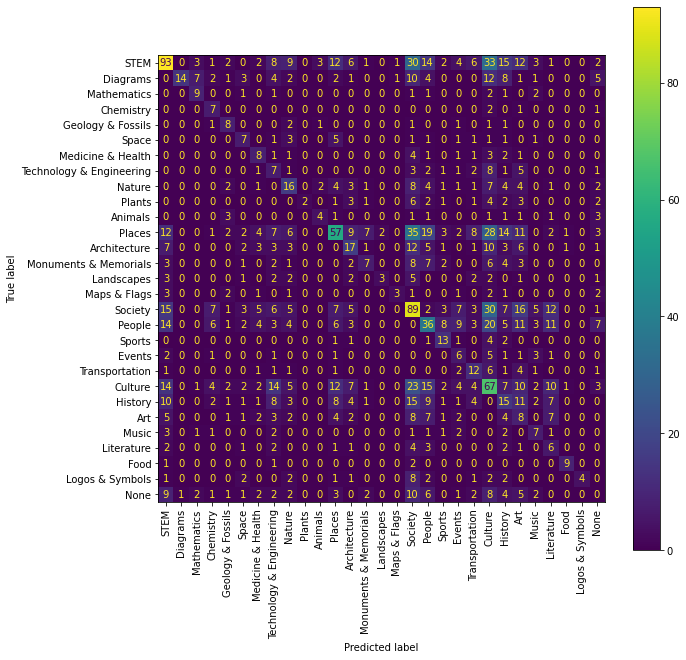

In [55]:
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(
    conf_mat, display_labels=encoder.classes_.tolist() + ["None"]
)
disp.plot(xticks_rotation="vertical", ax=ax)
plt.savefig(REPORTS_PATH + "confusion_matrix.pdf", bbox_inches="tight")